C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  exchange = yf.download('KRW=X', period='1d', progress=False)
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rate = float(exchange['Close'].iloc[-1])  # float()로 변환!



💱 실시간 환율: $1 = ₩1,457.68
⏰ 업데이트 시간: 2025-11-14 13:08:29

📊 데이터 수집 중...

✅ 삼성전자 데이터 수집 완료


C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:53: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2025-01-01', progress=False)['Close']
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data.iloc[-1])
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_price = float(data.iloc[0])
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  max_price = float(data.max())
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\

✅ 엔비디아 데이터 수집 완료


C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:60: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data.iloc[-1])
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_price = float(data.iloc[0])
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  max_price = float(data.max())
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  min_price = float(data.min())
C:\Users\sec\AppData\Loca

✅ 코카콜라 데이터 수집 완료

📈 삼성전자 / 엔비디아 / 코카콜라 종합 분석 (2025년 올해)
  종목     티커 국가                현재가      최고가     최저가 2025 수익률  평균 일일   변동성
삼성전자 005930 🇰🇷   ₩98,850 ($67.81) ₩111,100 ₩51,000  +85.11% +0.32% 2.08%
엔비디아   NVDA 🇺🇸 $186.86 (₩272,382)  $207.04  $94.30  +35.13% +0.19% 3.26%
코카콜라     KO 🇺🇸  $71.07 (₩103,597)   $72.82  $59.48  +17.49% +0.08% 1.14%

📊 차트 생성 중...



C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:171: FutureWarning: YF.download() has changed argument auto_adjust default to True
  volume_data = yf.download(ticker, start='2025-01-01', progress=False)['Volume']
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:171: FutureWarning: YF.download() has changed argument auto_adjust default to True
  volume_data = yf.download(ticker, start='2025-01-01', progress=False)['Volume']
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:188: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  start_p = float(stock_data[ticker].iloc[0])
C:\Users\sec\AppData\Local\Temp\ipykernel_55892\1683482259.py:189: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  end_p = float(stock_data[ticker].iloc[-1])
C:\Users\sec\AppData\Local\Temp\ipy

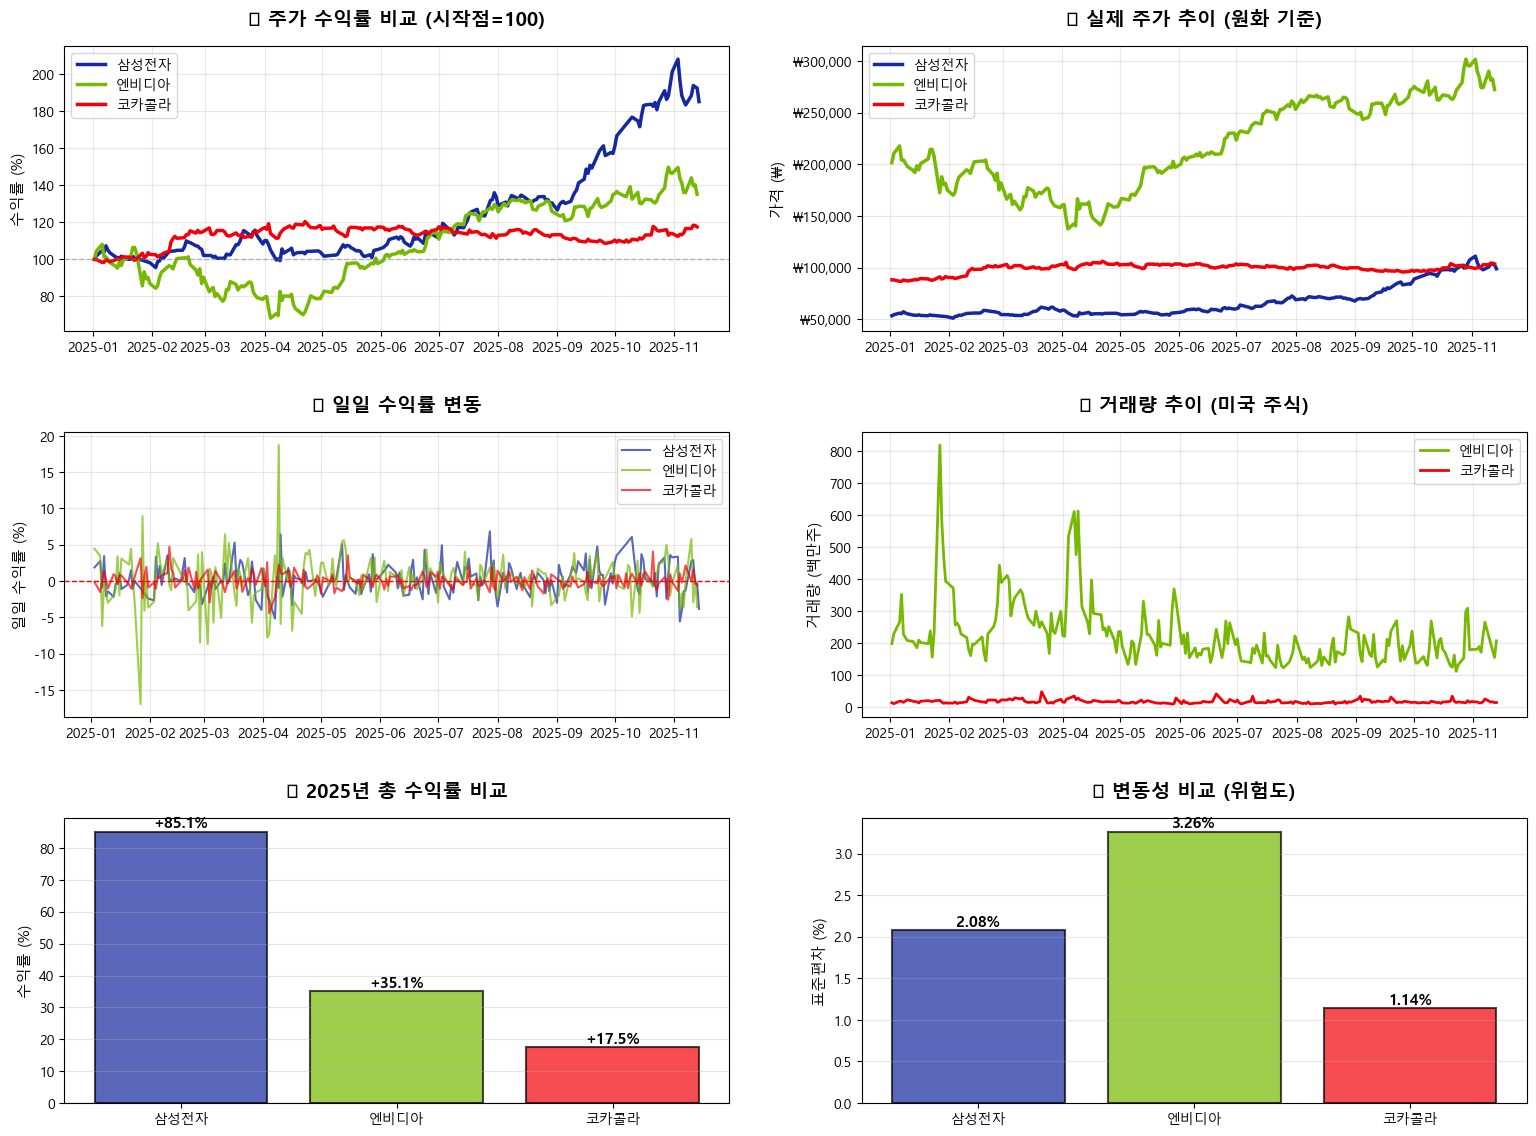


🎉 분석 완료!


In [5]:
import yfinance as yf
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정 (맥/윈도우 자동 감지)
import platform
if platform.system() == 'Darwin':  # Mac
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
else:  # Linux
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ===== 실시간 환율 가져오기 (수정!) =====
def get_live_exchange_rate():
    """실시간 USD/KRW 환율"""
    try:
        exchange = yf.download('KRW=X', period='1d', progress=False)
        rate = float(exchange['Close'].iloc[-1])  # float()로 변환!
        return rate
    except Exception as e:
        print(f"⚠️ 환율 가져오기 실패: {e}")
        print("⚠️ 기본값 1300 사용")
        return 1300.0

EXCHANGE_RATE = get_live_exchange_rate()

print("\n" + "=" * 100)
print(f"💱 실시간 환율: $1 = ₩{EXCHANGE_RATE:,.2f}")
print(f"⏰ 업데이트 시간: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 100)

# ===== 분석할 종목 =====
stocks = {
    '005930': {'name': '삼성전자', 'country': 'KR', 'color': '#1428A0'},
    'NVDA': {'name': '엔비디아', 'country': 'US', 'color': '#76B900'},
    'KO': {'name': '코카콜라', 'country': 'US', 'color': '#F40009'}
}

# ===== 데이터 수집 (2025년 1월 1일부터) =====
print("\n📊 데이터 수집 중...\n")
stock_data = {}
results = []

for ticker, info in stocks.items():
    try:
        # 데이터 가져오기 (2025년 시작부터)
        if info['country'] == 'US':
            data = yf.download(ticker, start='2025-01-01', progress=False)['Close']
        else:  # KR
            data = fdr.DataReader(ticker, '2025-01-01')['Close']
        
        stock_data[ticker] = data
        
        # 기본 통계 (모두 float로 변환!)
        current_price = float(data.iloc[-1])
        start_price = float(data.iloc[0])
        max_price = float(data.max())
        min_price = float(data.min())
        
        # 수익률 계산
        total_return = ((current_price - start_price) / start_price) * 100
        avg_daily_return = float(data.pct_change().mean()) * 100
        volatility = float(data.pct_change().std()) * 100
        
        # 미국 주식: 달러 + 원화 표시
        if info['country'] == 'US':
            result = {
                '종목': info['name'],
                '티커': ticker,
                '국가': '🇺🇸',
                '현재가': f'${current_price:,.2f} (₩{current_price * EXCHANGE_RATE:,.0f})',
                '최고가': f'${max_price:,.2f}',
                '최저가': f'${min_price:,.2f}',
                '2025 수익률': f'{total_return:+.2f}%',
                '평균 일일': f'{avg_daily_return:+.2f}%',
                '변동성': f'{volatility:.2f}%'
            }
        else:  # 한국 주식
            result = {
                '종목': info['name'],
                '티커': ticker,
                '국가': '🇰🇷',
                '현재가': f'₩{current_price:,.0f} (${current_price / EXCHANGE_RATE:,.2f})',
                '최고가': f'₩{max_price:,.0f}',
                '최저가': f'₩{min_price:,.0f}',
                '2025 수익률': f'{total_return:+.2f}%',
                '평균 일일': f'{avg_daily_return:+.2f}%',
                '변동성': f'{volatility:.2f}%'
            }
        
        results.append(result)
        print(f"✅ {info['name']} 데이터 수집 완료")
        
    except Exception as e:
        print(f"❌ {info['name']} 데이터 수집 실패: {e}")

# ===== 결과 출력 =====
df_results = pd.DataFrame(results)
print("\n" + "=" * 150)
print("📈 삼성전자 / 엔비디아 / 코카콜라 종합 분석 (2025년 올해)")
print("=" * 150)
print(df_results.to_string(index=False))
print("=" * 150)

# ===== 시각화 시작 =====
print("\n📊 차트 생성 중...\n")

# 그림 크기 설정
fig = plt.figure(figsize=(16, 12))

# ===== 1. 주가 추이 비교 (정규화) =====
ax1 = plt.subplot(3, 2, 1)
for ticker, info in stocks.items():
    if ticker in stock_data:
        # 시작점을 100으로 정규화
        normalized = (stock_data[ticker] / stock_data[ticker].iloc[0]) * 100
        ax1.plot(normalized.index, normalized.values, 
                label=info['name'], linewidth=2.5, color=info['color'])

ax1.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_title('📈 주가 수익률 비교 (시작점=100)', fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('수익률 (%)', fontsize=11)
ax1.legend(fontsize=10, loc='upper left')
ax1.grid(True, alpha=0.3)

# ===== 2. 실제 주가 추이 (원화 환산) =====
ax2 = plt.subplot(3, 2, 2)
for ticker, info in stocks.items():
    if ticker in stock_data:
        if info['country'] == 'US':
            # 미국 주식은 원화로 환산
            data_krw = stock_data[ticker] * EXCHANGE_RATE
        else:
            data_krw = stock_data[ticker]
        
        ax2.plot(data_krw.index, data_krw.values, 
                label=info['name'], linewidth=2.5, color=info['color'])

ax2.set_title('💰 실제 주가 추이 (원화 기준)', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylabel('가격 (₩)', fontsize=11)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
# Y축 포맷팅
def won_formatter(x, p):
    return f'₩{x:,.0f}'
ax2.yaxis.set_major_formatter(FuncFormatter(won_formatter))

# ===== 3. 일일 수익률 변동 =====
ax3 = plt.subplot(3, 2, 3)
for ticker, info in stocks.items():
    if ticker in stock_data:
        daily_returns = stock_data[ticker].pct_change() * 100
        ax3.plot(daily_returns.index, daily_returns.values, 
                label=info['name'], linewidth=1.5, alpha=0.7, color=info['color'])

ax3.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax3.set_title('📊 일일 수익률 변동', fontsize=14, fontweight='bold', pad=15)
ax3.set_ylabel('일일 수익률 (%)', fontsize=11)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# ===== 4. 거래량 (미국 주식만) =====
ax4 = plt.subplot(3, 2, 4)
for ticker, info in stocks.items():
    if info['country'] == 'US':
        volume_data = yf.download(ticker, start='2025-01-01', progress=False)['Volume']
        ax4.plot(volume_data.index, volume_data.values / 1_000_000, 
                label=info['name'], linewidth=2, color=info['color'])

ax4.set_title('📦 거래량 추이 (미국 주식)', fontsize=14, fontweight='bold', pad=15)
ax4.set_ylabel('거래량 (백만주)', fontsize=11)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# ===== 5. 2025년 수익률 막대 그래프 =====
ax5 = plt.subplot(3, 2, 5)
returns_data = []
colors_list = []
names_list = []

for ticker, info in stocks.items():
    if ticker in stock_data:
        start_p = float(stock_data[ticker].iloc[0])
        end_p = float(stock_data[ticker].iloc[-1])
        ret = ((end_p - start_p) / start_p) * 100
        returns_data.append(ret)
        colors_list.append(info['color'])
        names_list.append(info['name'])

bars = ax5.bar(names_list, returns_data, color=colors_list, alpha=0.7, edgecolor='black', linewidth=1.5)
ax5.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax5.set_title('🏆 2025년 총 수익률 비교', fontsize=14, fontweight='bold', pad=15)
ax5.set_ylabel('수익률 (%)', fontsize=11)
ax5.grid(True, alpha=0.3, axis='y')

# 막대 위에 수치 표시
for bar, ret in zip(bars, returns_data):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{ret:+.1f}%', ha='center', va='bottom' if height > 0 else 'top',
            fontsize=11, fontweight='bold')

# ===== 6. 변동성 비교 =====
ax6 = plt.subplot(3, 2, 6)
volatility_data = []
vol_colors = []
vol_names = []

for ticker, info in stocks.items():
    if ticker in stock_data:
        vol = float(stock_data[ticker].pct_change().std()) * 100
        volatility_data.append(vol)
        vol_colors.append(info['color'])
        vol_names.append(info['name'])

bars2 = ax6.bar(vol_names, volatility_data, color=vol_colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax6.set_title('📉 변동성 비교 (위험도)', fontsize=14, fontweight='bold', pad=15)
ax6.set_ylabel('표준편차 (%)', fontsize=11)
ax6.grid(True, alpha=0.3, axis='y')

# 막대 위에 수치 표시
for bar, vol in zip(bars2, volatility_data):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{vol:.2f}%', ha='center', va='bottom',
            fontsize=11, fontweight='bold')

# 레이아웃 조정
plt.tight_layout(pad=3.0)

# 그냥 화면에 표시만!
plt.show()

print("\n" + "=" * 100)
print("🎉 분석 완료!")
print("=" * 100)